<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df_data = pd.read_csv('/datasets/insurance.csv')
display(df_data.head(5))
display(df_data.describe())
df_data.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Число полных дубликатов:  153

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null Int64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: Int64(1), float64(1), int64(3)
memory usage: 200.3 KB



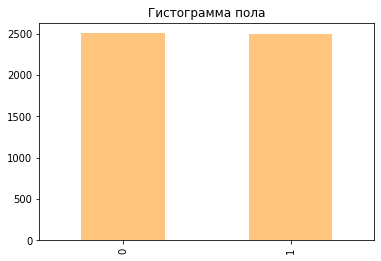

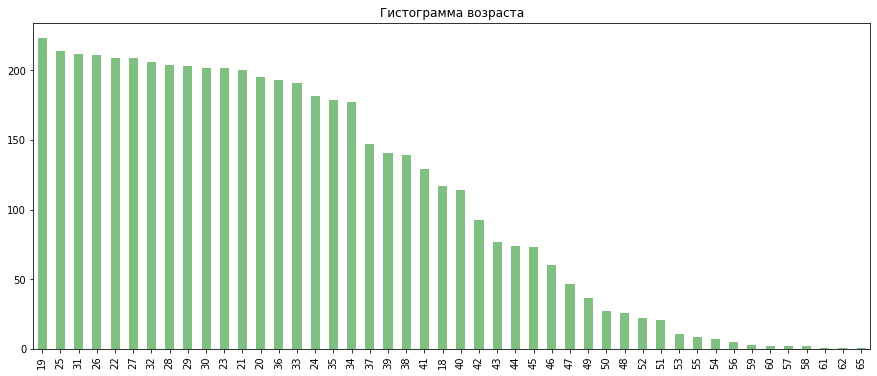

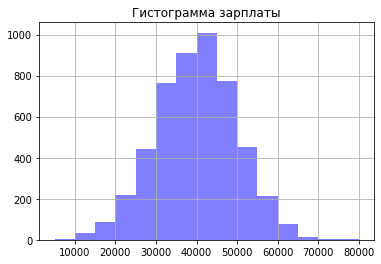

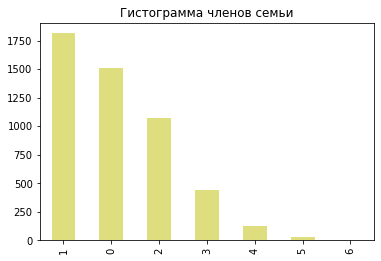

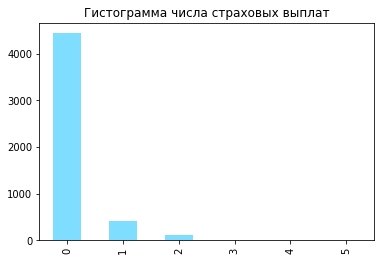

In [82]:
#Проверим, есть ли пропуски в данных
display(df_data.isnull().sum())

#Проверим наличие полных дубликатов
print('Число полных дубликатов: ', df_data.duplicated().sum())
##В данном датасете дубликаты - это не ошибка

#Преобразуем тип возрастав в int из  float
df_data['Возраст'] = df_data['Возраст'].astype('Int64')
#df_data['Возраст'] = df_data['Возраст'].astype('Int64')
print()
df_data.info()
print()
#Посмотрим на распределение данных на графиках
df_data['Пол'].value_counts().plot(kind='bar',label= 'Пол', color = '#FF8C00', alpha = 0.5)
plt.title('Гистограмма пола')
plt.show()

df_data['Возраст'].value_counts().plot(figsize=(15,6),kind='bar',label= 'Возраст', color = 'g', alpha = 0.5)
plt.title('Гистограмма возраста')
plt.show()

df_data['Зарплата'].hist(bins=15,range=(5000,80000), label= 'Зарплата', color = 'b', alpha = 0.5)
plt.title('Гистограмма зарплаты')
plt.show()

df_data['Члены семьи'].value_counts().plot(kind='bar',label= 'Члены семьи', color = 'y', alpha = 0.5)
plt.title('Гистограмма членов семьи')
plt.show()

df_data['Страховые выплаты'].value_counts().plot(kind='bar',label= 'Число страховых выплат', color = '#00BFFF', alpha = 0.5)
plt.title('Гистограмма числа страховых выплат')
plt.show()

<div class="alert alert-block alert-success">
✔️ Проделан очень подробный предварительный анализ данных. Препятствий к выполнению задачи нет.
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умнажении признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** для обоснования получим предсказания домноженных на обратимую матрицу признаков и сравним с исходными.

1. Предсказания для домноженных на обратимую матрицу признаков:
$$
b = XPw'
$$

Формула обучения:
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

2. Рассмотрим следующие свойства обратимых и транспонированных матриц:

$$(AB)^{-1}=B^{-1}A^{-1}
$$
$$(A^{T})^{-1}=(A^{-1})^{T}
$$
$$(AB)^{T}=B^{T}A^{T}
$$
$$(A^{T})^{-1}=(A^{-1})^{T}
$$
и свойство умножения матриц:
$$A(BC)=(AB)C
$$

Тогда формула обучения:
$$w' = (P^T X^T XP)^{-1} P^T X^T y
$$
$$w' = (P^T X^T XP)^{-1} P^T X^T y
$$
$$w' = (X^T XP)^{-1} (P^T)^{-1} P^T X^T y
$$
$$w' = P^{-1}(X^T X)^{-1} X^T y
$$
Так как $$b = XPw'$$ то  $$b = XP P^{-1}(X^T X)^{-1} X^T y
$$
$$b = X(X^T X)^{-1} X^T y
$$
$$b = Xw
$$
Значит,
$$ b=a
$$

## Алгоритм преобразования

**Алгоритм**
1. Определим признаки для обучения модели и случайную обратимую матрицу P
2. Умножим исходные признаки на обратимую матрицу и посчитаем метрику R2. 

**Обоснование**

Как показано на Шаге 2, при таком преобразовании качество моделей линейной регрессии не ухудшится.

## Проверка алгоритма

In [85]:
#1. Определим признаки для обучения модели и случайную обратимую матрицу P
features = df_data.drop('Страховые выплаты', axis = 1)
target = df_data['Страховые выплаты']
print("Размеры признаков для обучающей выборки: ", features.shape)
print("Размеры целевого признака: ", target.shape)
P = np.random.normal(size = (features.shape[1],features.shape[1]))

while np.linalg.det(P) == 0: #проверяем на обратимость
    P = np.random.normal(size = (features.shape[1],features.shape[1]))
print("Случайная матрица P:", P)

Размеры признаков для обучающей выборки:  (5000, 4)
Размеры целевого признака:  (5000,)
Случайная матрица P: [[-0.15894088  0.86727081 -0.60030046  0.30563389]
 [-0.02418549 -0.07729853  2.8598873  -0.23709247]
 [ 0.55700655  0.03074217 -0.82232494  0.49543046]
 [ 0.81465278  0.82621986 -0.8652656   0.82469138]]


In [86]:
#Создадим модель линейной регрессии до преобразования и посчитаем метрику R2.
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print('Метрика исходной модели линейной регрессии R2', r2)

Метрика исходной модели линейной регрессии R2 0.42494550286668


In [87]:
#2. Умножим исходные признаки на обратимую матрицу и посчитаем метрику R2.
features_P = np.dot(features, P)
model.fit(features_P, target)
predictions_P = model.predict(features_P)
r2_P = r2_score(target, predictions_P)
print('Метрика исходной модели линейной регрессии R2', r2_P)

Метрика исходной модели линейной регрессии R2 0.42494550286672605


**Вывод**

Мы получили равные метрики R2 в обоих проверках (R2 = 0.425)

Наш тест подтвердил, что выбранный алгоритм преобразования данных не меняет качество предсказания модели линейной регрессии.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования